# XGBoost

* 트리 기반의 앙상블 기법
* 분류에 있어서 다른 알고리즘보다 좋은 예측 성능을 보여줌
* XGBoost는 GBM 기반이지만, GBM의 단점인 느린 수행 시간과 과적합 규제 부재 등의 문제를 해결
* 병렬 CPU 환경에서 빠르게 학습 가능

In [1]:
from sklearn.datasets import load_iris, load_breast_cancer, load_boston, load_diabetes, load_wine
from sklearn.model_selection import train_test_split, cross_validate
from sklearn.metrics import accuracy_score, precision_score, recall_score

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor
from xgboost import plot_importance, plot_tree

import graphviz
import matplotlib.pyplot as plt
plt.style.use(['seaborn-whitegrid'])

## 파이썬 기반 XGBoost

In [2]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)
dtrain = xgb.DMatrix(data=X_train,label=y_train)
dtest = xgb.DMatrix(data=X_test, label = y_test)

In [3]:
params = {
    'max_depth':3,
    'eta':0.1,
    'objective':'binary:logistic',
    'eval_metric':'logloss',
    'early_stopping':100
}
num_rounds = 400

In [4]:
evals = [(dtrain,'train'),(dtest,'eval')]
xgb_model = xgb.train(params=params, dtrain=dtrain, num_boost_round=num_rounds,
                      early_stopping_rounds= 100, evals=evals)

[0]	train-logloss:0.609436	eval-logloss:0.610101
Multiple eval metrics have been passed: 'eval-logloss' will be used for early stopping.

Will train until eval-logloss hasn't improved in 100 rounds.
[1]	train-logloss:0.540471	eval-logloss:0.540739
[2]	train-logloss:0.482113	eval-logloss:0.484899
[3]	train-logloss:0.433653	eval-logloss:0.43922
[4]	train-logloss:0.39072	eval-logloss:0.39791
[5]	train-logloss:0.353717	eval-logloss:0.362107
[6]	train-logloss:0.322225	eval-logloss:0.329962
[7]	train-logloss:0.292921	eval-logloss:0.301791
[8]	train-logloss:0.267306	eval-logloss:0.278011
[9]	train-logloss:0.244087	eval-logloss:0.25775
[10]	train-logloss:0.22517	eval-logloss:0.240372
[11]	train-logloss:0.208073	eval-logloss:0.222709
[12]	train-logloss:0.191772	eval-logloss:0.207948
[13]	train-logloss:0.17746	eval-logloss:0.195312
[14]	train-logloss:0.164082	eval-logloss:0.184597
[15]	train-logloss:0.152497	eval-logloss:0.171834
[16]	train-logloss:0.141981	eval-logloss:0.161516
[17]	train-loglo

In [ ]:
import numpy as np


predicts = xgb_model.predict(dtest)
print(np.round(predicts[:10],3))

[1.    0.999 0.001 0.995 0.001 0.989 0.995 0.998 0.966 0.795]


In [ ]:
preds = [1 if x > 0.5 else 0 for x in predicts]
print(preds[:10])

[1, 1, 0, 1, 0, 1, 1, 1, 1, 1]


In [ ]:
print('정확도: {}'.format(accuracy_score(y_test, preds)))
print('정밀도: {}'.format(precision_score(y_test, preds)))
print('재현율: {}'.format(recall_score(y_test, preds)))

정확도: 0.9736842105263158
정밀도: 0.972972972972973
재현율: 0.9863013698630136


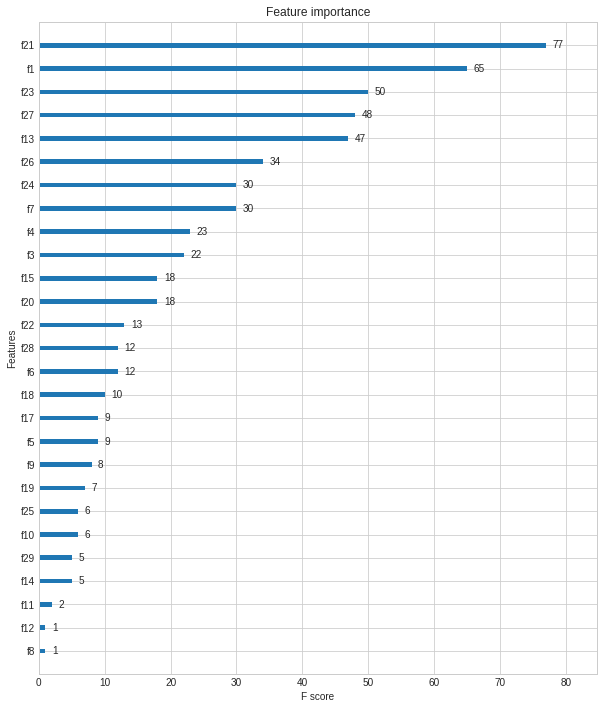

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgb_model, ax=ax);

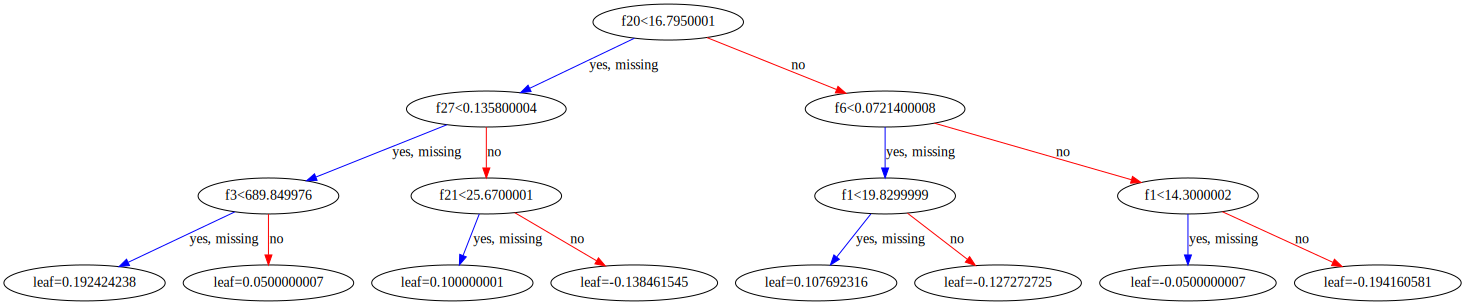

In [ ]:
dot_data = xgb.to_graphviz(xgb_model)
graph = graphviz.Source(dot_data)
graph

## XGBClassifier

### 붓꽃 데이터

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train,y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:,1]

In [ ]:
cross_val= cross_validate(
    estimator=xgbc,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.04970369338989258 (+/-0.0031222693660884057)
avg score time: 0.000993824005126953 (+/-4.398615374753829e-05)
avg test score: 0.96 (+/-0.024944382578492935)


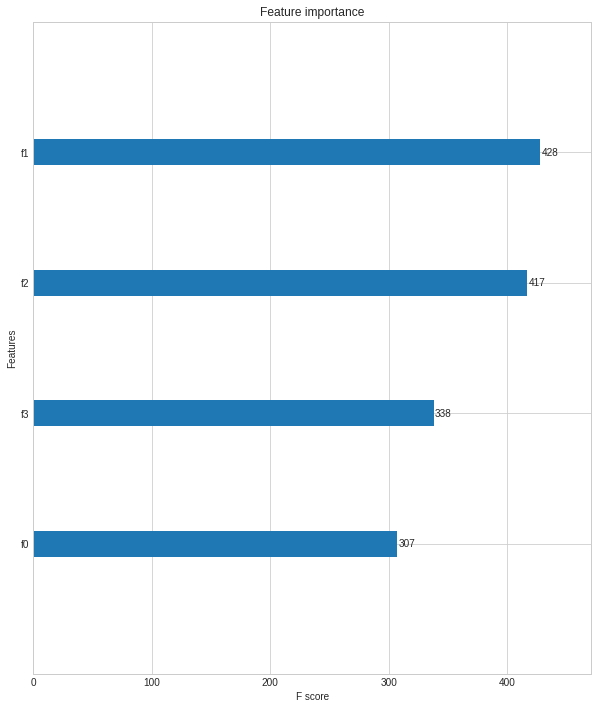

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax);

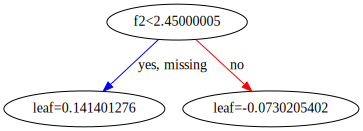

In [ ]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

### 와인 데이터

In [ ]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train,y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:,1]

In [ ]:
cross_val= cross_validate(
    estimator=xgbc,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.08577947616577149 (+/-0.00550913105781498)
avg score time: 0.0009798526763916016 (+/-2.4849301506243653e-05)
avg test score: 0.9609523809523809 (+/-0.028267341226138717)


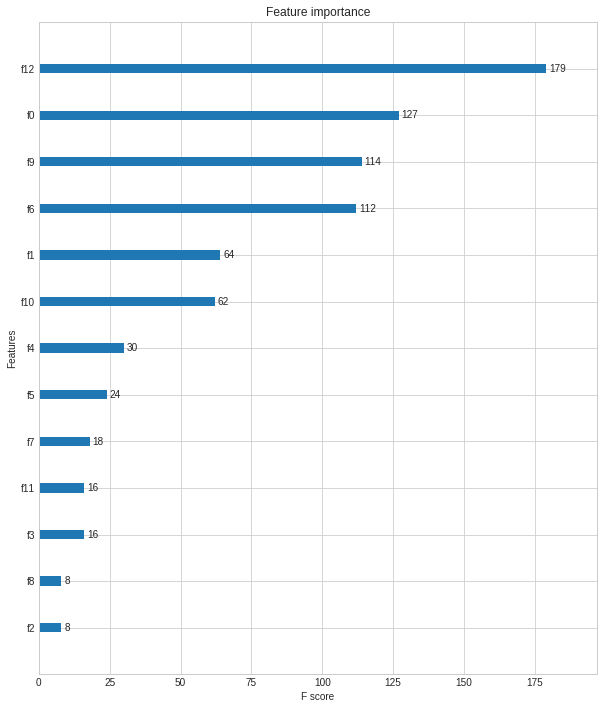

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax);

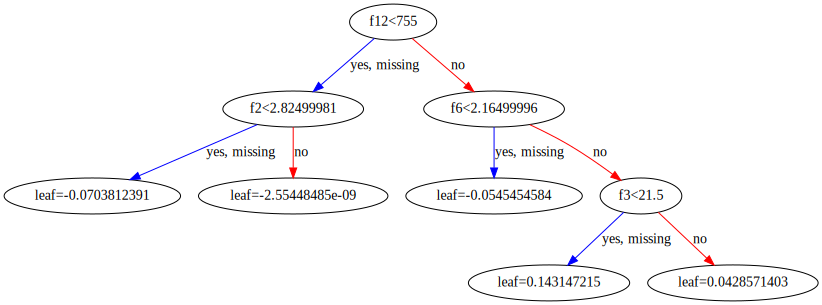

In [ ]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [ ]:
xgbc = XGBClassifier(n_estimators=400, learning_rate=0.1, max_depth=3)
xgbc.fit(X_train,y_train)
preds = xgbc.predict(X_test)
preds_proba = xgbc.predict_proba(X_test)[:,1]

In [ ]:
cross_val= cross_validate(
    estimator=xgbc,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.20553145408630372 (+/-0.004143890207596926)
avg score time: 0.0014138221740722656 (+/-6.647253650661615e-05)
avg test score: 0.9736376339077782 (+/-0.009609619188189153)


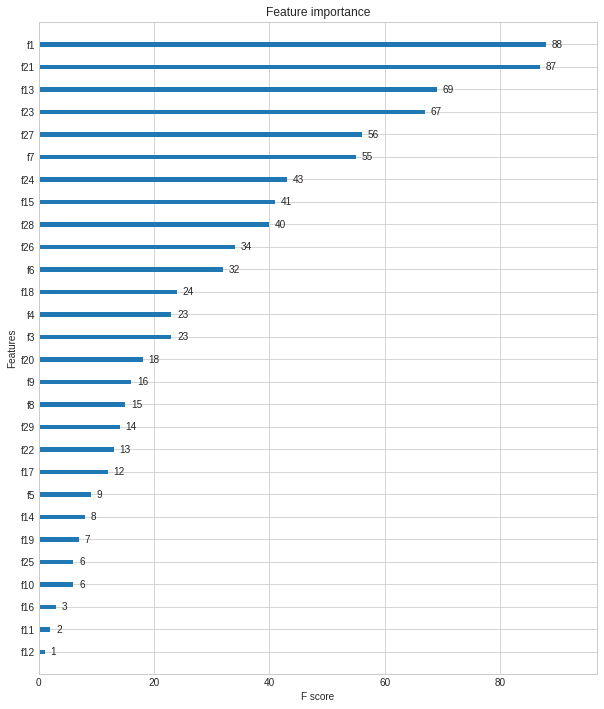

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbc, ax=ax);

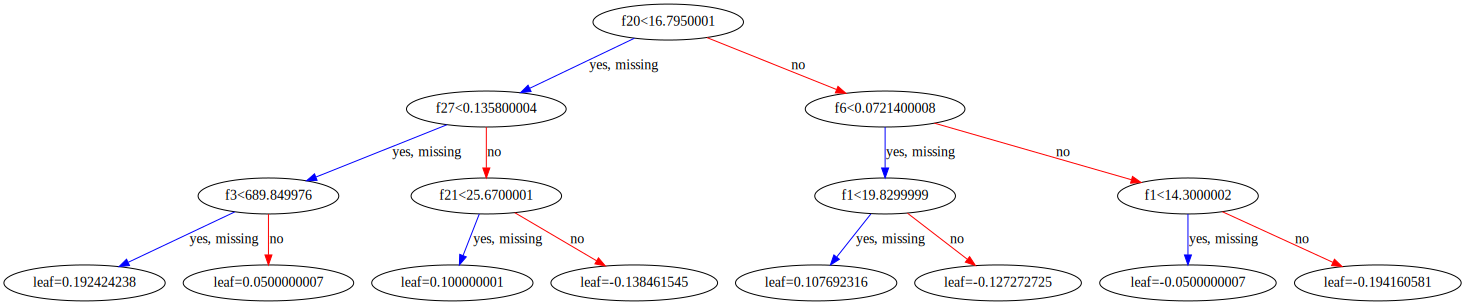

In [ ]:
dot_data = xgb.to_graphviz(xgbc)
graph = graphviz.Source(dot_data)
graph

## XGBRegressor

### 보스턴 데이터

In [ ]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [ ]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
xgbr.fit(X_train,y_train)
preds = xgbr.predict(X_test)

In [ ]:
cross_val= cross_validate(
    estimator=xgbr,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.14374566078186035 (+/-0.0040332354055260125)
avg score time: 0.002127933502197266 (+/-9.209210736816373e-05)
avg test score: 0.6884390572208088 (+/-0.164997474845101)


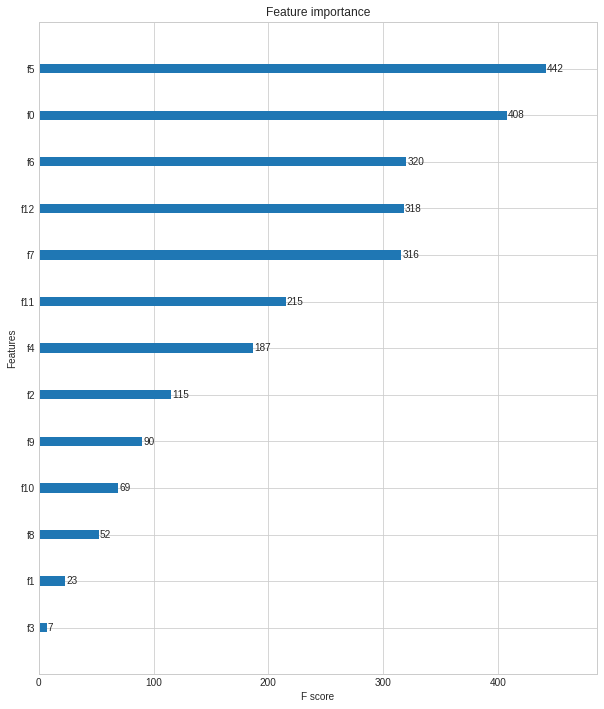

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbr, ax=ax);

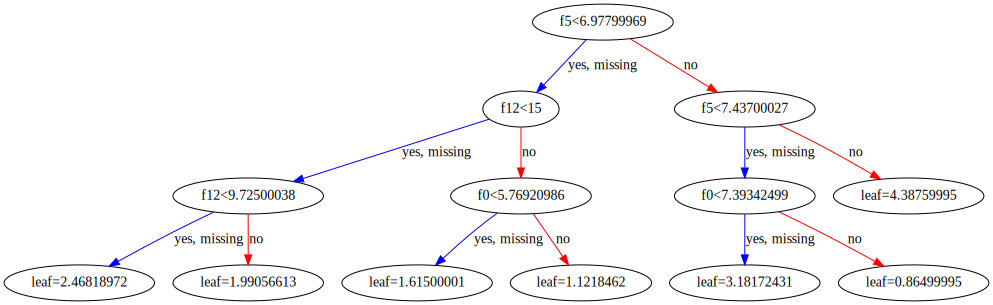

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

### 당뇨병 데이터

In [ ]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [ ]:
xgbr = XGBRegressor(n_estimators=400, learning_rate=0.1, max_depth=3, objective='reg:squarederror')
xgbr.fit(X_train,y_train)
preds = xgbr.predict(X_test)

In [ ]:
cross_val= cross_validate(
    estimator=xgbr,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.11824145317077636 (+/-0.003906737798053605)
avg score time: 0.0020087242126464845 (+/-0.00014104214435671454)
avg test score: 0.3000529025802777 (+/-0.07589311710543882)


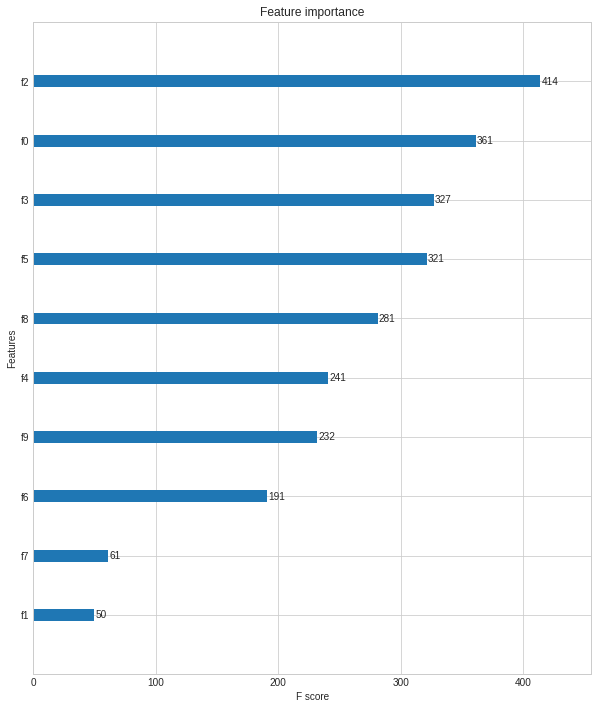

In [ ]:
fig, ax = plt.subplots(figsize=(10,12))
plot_importance(xgbr, ax=ax);

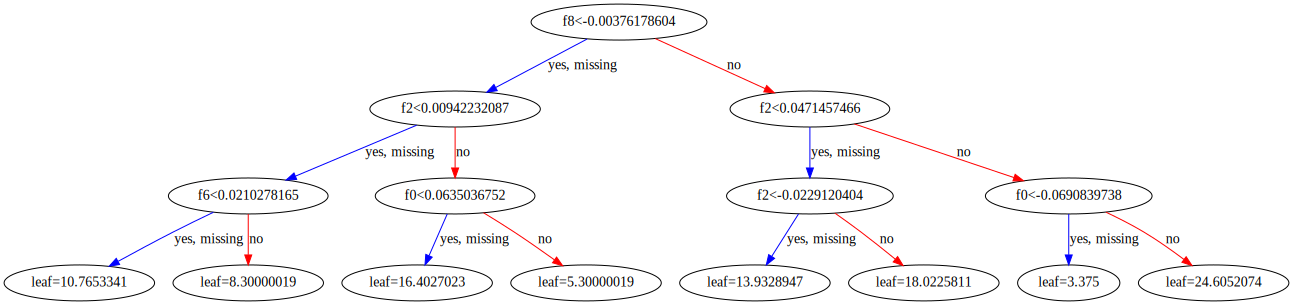

In [ ]:
dot_data = xgb.to_graphviz(xgbr)
graph = graphviz.Source(dot_data)
graph

# LightGBM

* 빠른 학습과 예측 시간
* 더 적은 메모리 사용
* 범주형 특징의 자동 변환과 최적 분할

In [ ]:
from lightgbm import LGBMClassifier,LGBMRegressor
from lightgbm import plot_importance, plot_metric, plot_tree

## LGBMClassifier

### 붓꽃 데이터

In [ ]:
iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=123)

In [ ]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,verbose=True)
preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 0.997777	valid_0's multi_logloss: 0.997777
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 0.895442	valid_0's multi_logloss: 0.895442
[3]	valid_0's multi_logloss: 0.809103	valid_0's multi_logloss: 0.809103
[4]	valid_0's multi_logloss: 0.732391	valid_0's multi_logloss: 0.732391
[5]	valid_0's multi_logloss: 0.669225	valid_0's multi_logloss: 0.669225
[6]	valid_0's multi_logloss: 0.608976	valid_0's multi_logloss: 0.608976
[7]	valid_0's multi_logloss: 0.557876	valid_0's multi_logloss: 0.557876
[8]	valid_0's multi_logloss: 0.513242	valid_0's multi_logloss: 0.513242
[9]	valid_0's multi_logloss: 0.470866	valid_0's multi_logloss: 0.470866
[10]	valid_0's multi_logloss: 0.437898	valid_0's multi_logloss: 0.437898
[11]	valid_0's multi_logloss: 0.403873	valid_0's multi_logloss: 0.403873
[12]	valid_0's multi_logloss: 0.375711	valid_0's multi_logloss: 0.375711
[13]	valid_0's multi_logloss: 0.348203	valid_0's multi_logloss: 0.3482

In [ ]:
cross_val= cross_validate(
    estimator=lgbmc,
    X=iris.data, y=iris.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.05816812515258789 (+/-0.006970902833400515)
avg score time: 0.0014438629150390625 (+/-9.469174391592408e-05)
avg test score: 0.9533333333333335 (+/-0.06182412330330468)


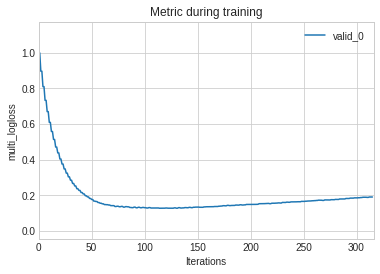

In [ ]:
plot_metric(lgbmc);

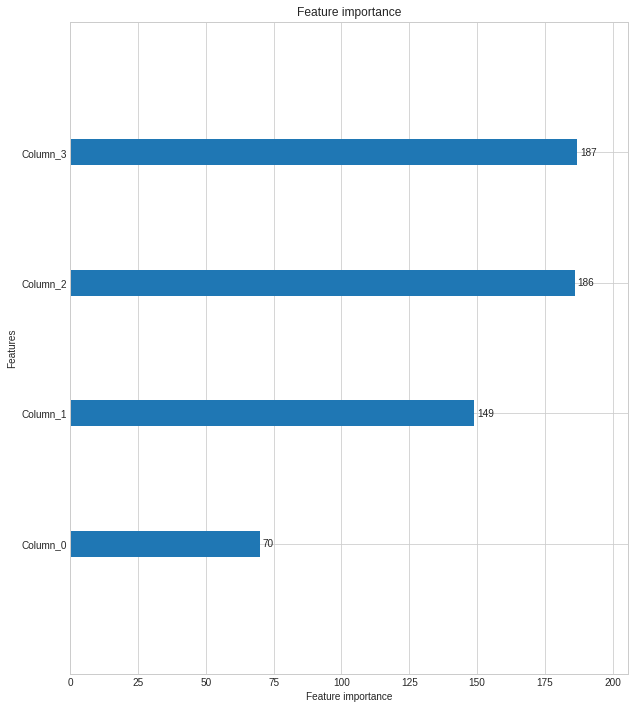

In [ ]:
plot_importance(lgbmc, figsize=(10,12));

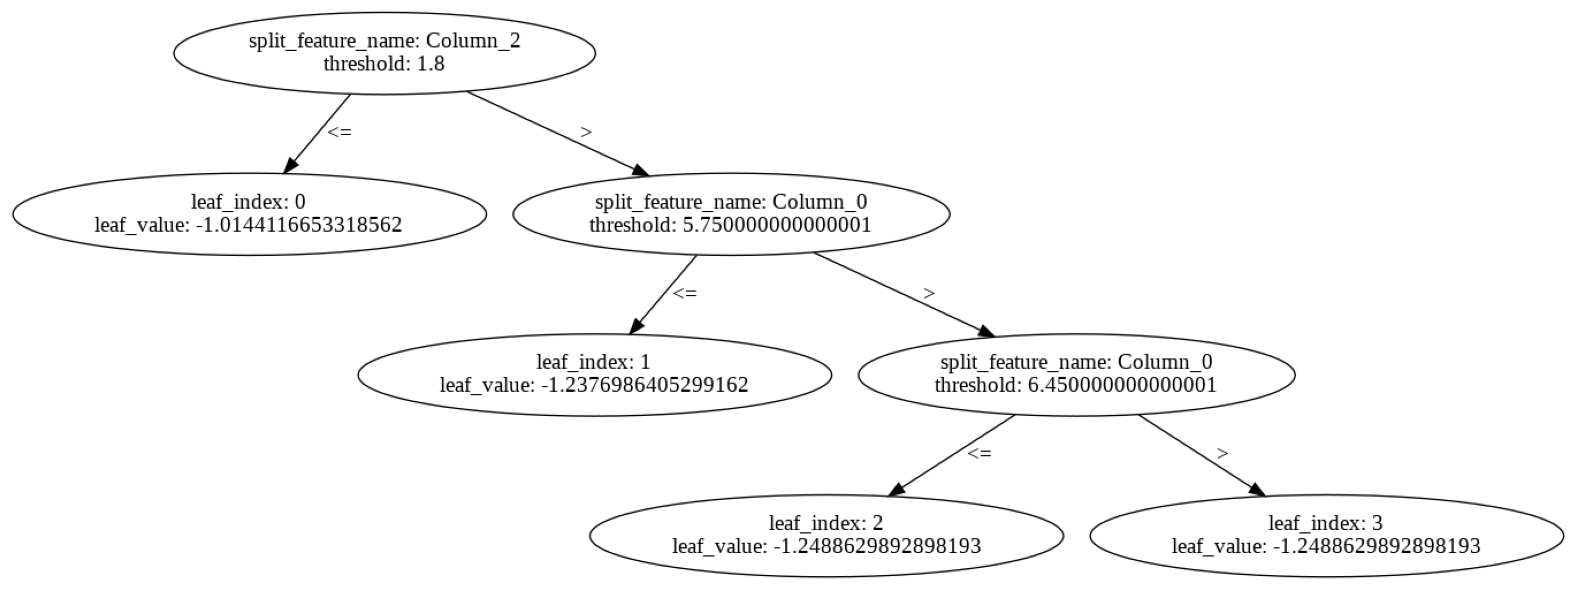

In [ ]:
plot_tree(lgbmc, figsize=(28,24));

### 와인 데이터

In [ ]:
wine = load_wine()
X_train, X_test, y_train, y_test = train_test_split(wine.data, wine.target, test_size=0.2, random_state=123)

In [ ]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,verbose=True)
preds = lgbmc.predict(X_test)

[1]	valid_0's multi_logloss: 1.09587	valid_0's multi_logloss: 1.09587
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's multi_logloss: 1.00013	valid_0's multi_logloss: 1.00013
[3]	valid_0's multi_logloss: 0.913552	valid_0's multi_logloss: 0.913552
[4]	valid_0's multi_logloss: 0.843464	valid_0's multi_logloss: 0.843464
[5]	valid_0's multi_logloss: 0.781558	valid_0's multi_logloss: 0.781558
[6]	valid_0's multi_logloss: 0.716933	valid_0's multi_logloss: 0.716933
[7]	valid_0's multi_logloss: 0.656888	valid_0's multi_logloss: 0.656888
[8]	valid_0's multi_logloss: 0.61532	valid_0's multi_logloss: 0.61532
[9]	valid_0's multi_logloss: 0.574294	valid_0's multi_logloss: 0.574294
[10]	valid_0's multi_logloss: 0.533566	valid_0's multi_logloss: 0.533566
[11]	valid_0's multi_logloss: 0.496561	valid_0's multi_logloss: 0.496561
[12]	valid_0's multi_logloss: 0.464202	valid_0's multi_logloss: 0.464202
[13]	valid_0's multi_logloss: 0.430112	valid_0's multi_logloss: 0.430112
[14

In [ ]:
cross_val= cross_validate(
    estimator=lgbmc,
    X=wine.data, y=wine.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.07231020927429199 (+/-0.004407551538209241)
avg score time: 0.001697206497192383 (+/-0.00029045742415950373)
avg test score: 0.9720634920634922 (+/-0.030430686929136006)


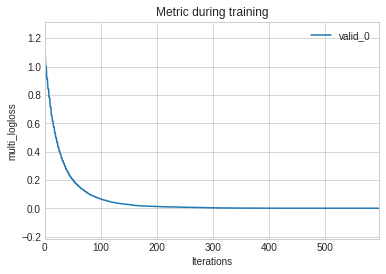

In [ ]:
plot_metric(lgbmc);

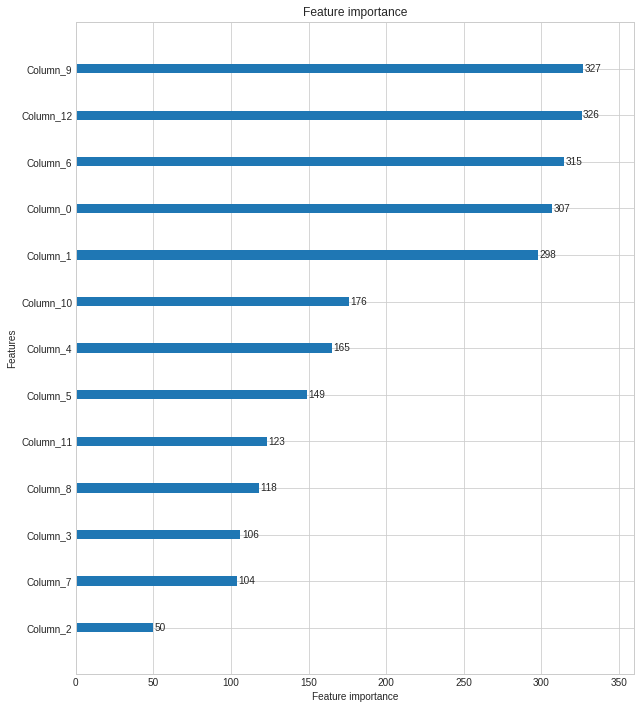

In [ ]:
plot_importance(lgbmc, figsize=(10,12));

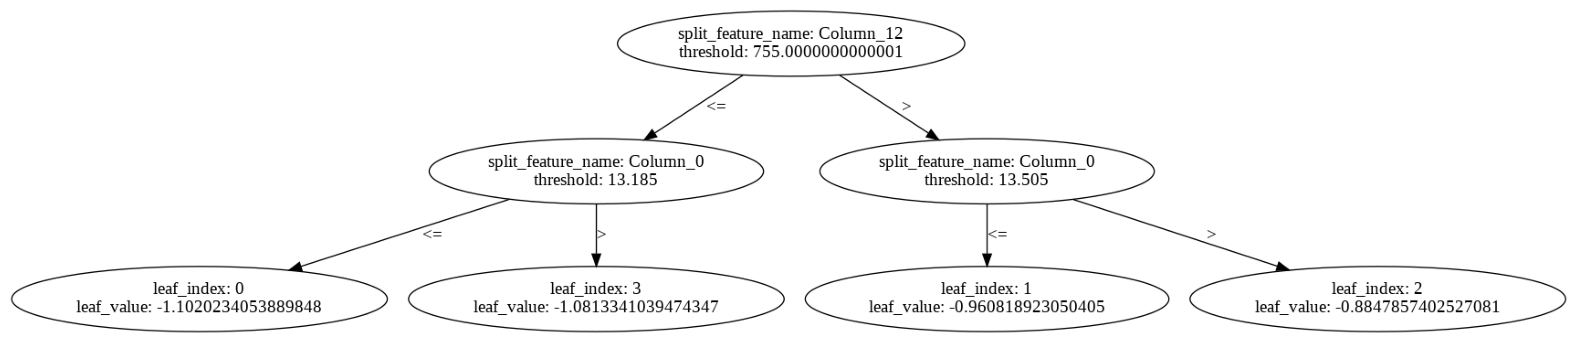

In [ ]:
plot_tree(lgbmc, figsize=(28,24));

### 유방암 데이터

In [ ]:
cancer = load_breast_cancer()
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size=0.2, random_state=123)

In [ ]:
lgbmc = LGBMClassifier(n_estimators=400)
evals = [(X_test, y_test)]
lgbmc.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,verbose=True)
preds = lgbmc.predict(X_test)

[1]	valid_0's binary_logloss: 0.575665	valid_0's binary_logloss: 0.575665
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's binary_logloss: 0.513919	valid_0's binary_logloss: 0.513919
[3]	valid_0's binary_logloss: 0.463418	valid_0's binary_logloss: 0.463418
[4]	valid_0's binary_logloss: 0.420506	valid_0's binary_logloss: 0.420506
[5]	valid_0's binary_logloss: 0.383753	valid_0's binary_logloss: 0.383753
[6]	valid_0's binary_logloss: 0.352228	valid_0's binary_logloss: 0.352228
[7]	valid_0's binary_logloss: 0.326437	valid_0's binary_logloss: 0.326437
[8]	valid_0's binary_logloss: 0.302562	valid_0's binary_logloss: 0.302562
[9]	valid_0's binary_logloss: 0.278182	valid_0's binary_logloss: 0.278182
[10]	valid_0's binary_logloss: 0.261933	valid_0's binary_logloss: 0.261933
[11]	valid_0's binary_logloss: 0.245115	valid_0's binary_logloss: 0.245115
[12]	valid_0's binary_logloss: 0.228615	valid_0's binary_logloss: 0.228615
[13]	valid_0's binary_logloss: 0.215537	valid_

In [ ]:
cross_val= cross_validate(
    estimator=lgbmc,
    X=cancer.data, y=cancer.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.2196810245513916 (+/-0.0035704319112696255)
avg score time: 0.00240473747253418 (+/-3.5047174309192194e-05)
avg test score: 0.9701288619779536 (+/-0.0180536992368202)


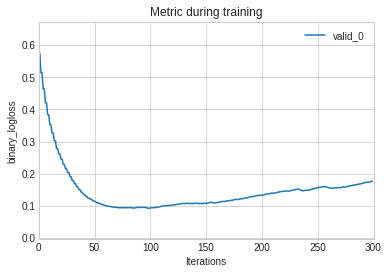

In [ ]:
plot_metric(lgbmc);

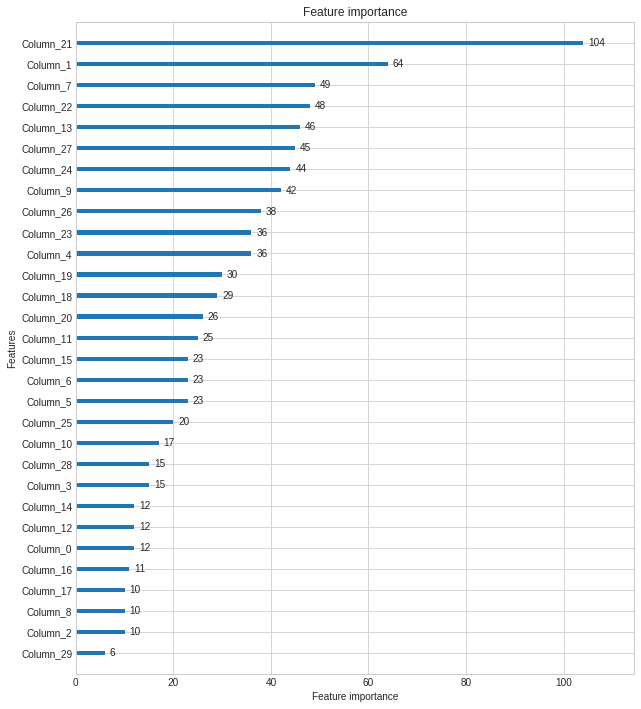

In [ ]:
plot_importance(lgbmc, figsize=(10,12));

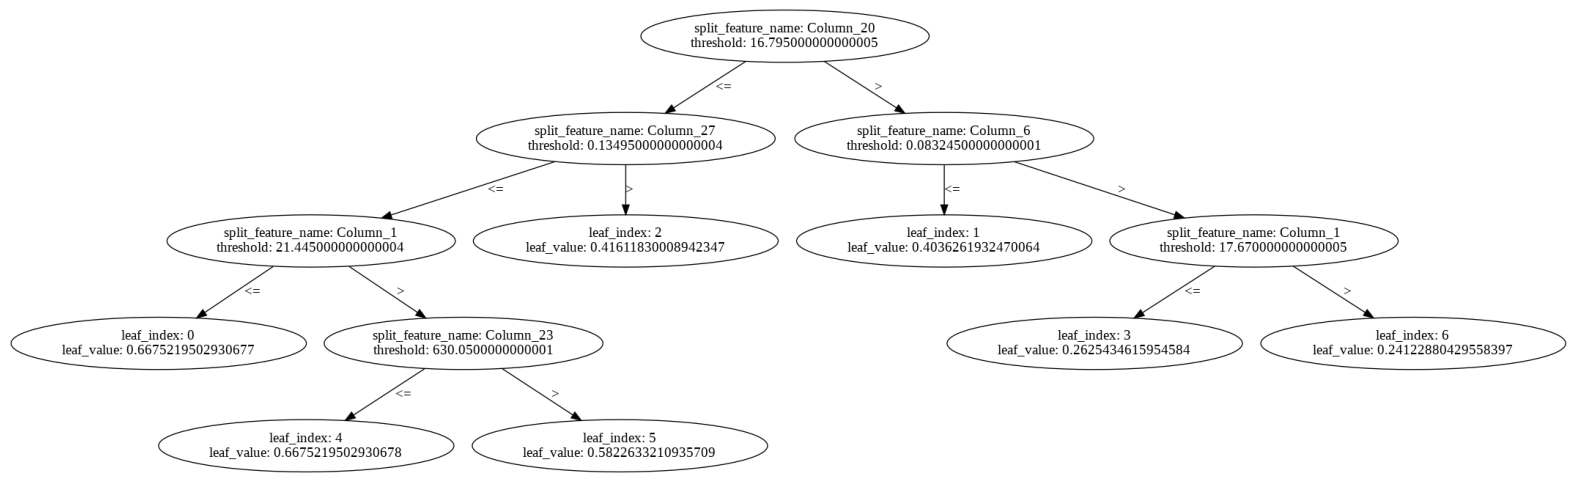

In [ ]:
plot_tree(lgbmc, figsize=(28,24));

## LGBMRegressor

### 보스턴 데이터

In [ ]:
boston = load_boston()
X_train, X_test, y_train, y_test = train_test_split(boston.data, boston.target, test_size=0.2, random_state=123)

In [ ]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,verbose=True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 71.4897
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 61.8603
[3]	valid_0's l2: 54.0848
[4]	valid_0's l2: 47.9263
[5]	valid_0's l2: 43.0702
[6]	valid_0's l2: 39.268
[7]	valid_0's l2: 36.2667
[8]	valid_0's l2: 33.8931
[9]	valid_0's l2: 31.7028
[10]	valid_0's l2: 30.082
[11]	valid_0's l2: 29.1638
[12]	valid_0's l2: 27.9059
[13]	valid_0's l2: 27.2503
[14]	valid_0's l2: 26.3942
[15]	valid_0's l2: 26.0862
[16]	valid_0's l2: 25.6483
[17]	valid_0's l2: 25.0221
[18]	valid_0's l2: 24.919
[19]	valid_0's l2: 24.5501
[20]	valid_0's l2: 24.2858
[21]	valid_0's l2: 23.9636
[22]	valid_0's l2: 23.8872
[23]	valid_0's l2: 23.676
[24]	valid_0's l2: 23.5907
[25]	valid_0's l2: 23.4353
[26]	valid_0's l2: 23.1653
[27]	valid_0's l2: 23.0198
[28]	valid_0's l2: 22.8605
[29]	valid_0's l2: 22.8311
[30]	valid_0's l2: 22.8943
[31]	valid_0's l2: 22.8056
[32]	valid_0's l2: 22.9915
[33]	valid_0's l2: 22.9286
[34]	valid_0's l2: 23.0395
[35]	valid_0's l2: 22.76
[36]	va

In [ ]:
cross_val= cross_validate(
    estimator=lgbmr,
    X=boston.data, y=boston.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.1605602264404297 (+/-0.005590486993195117)
avg score time: 0.0038157939910888673 (+/-0.0005279447602606032)
avg test score: 0.5692468252571979 (+/-0.2956636613238221)


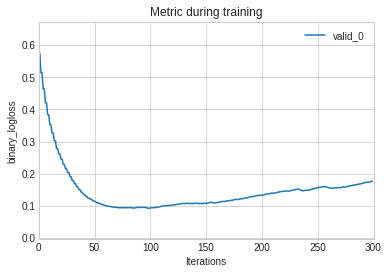

In [ ]:
plot_metric(lgbmc);

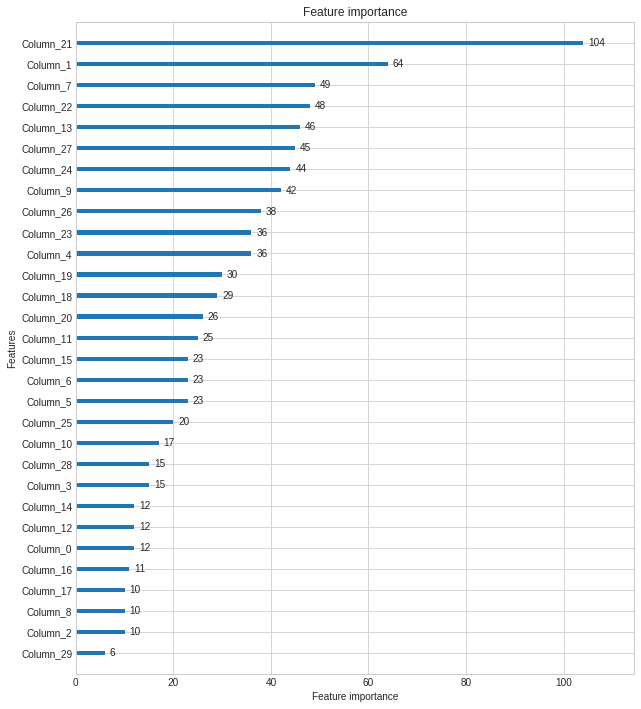

In [ ]:
plot_importance(lgbmc, figsize=(10,12));

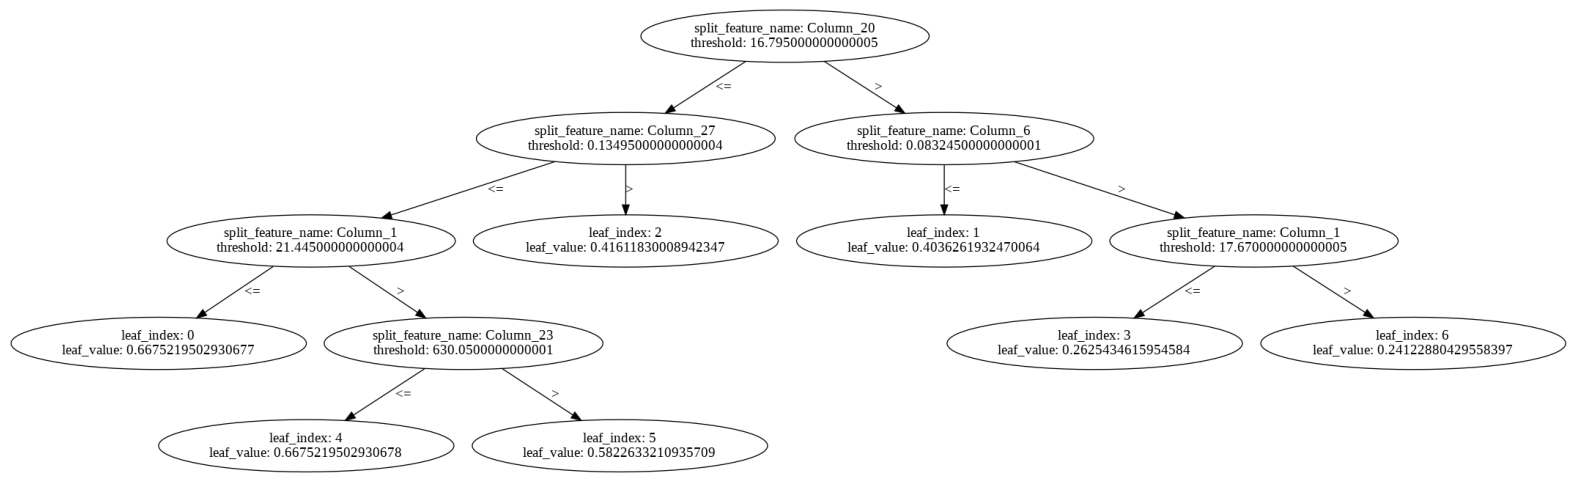

In [ ]:
plot_tree(lgbmc, figsize=(28,24));

### 당뇨병 데이터

In [ ]:
diabetes = load_diabetes()
X_train, X_test, y_train, y_test = train_test_split(diabetes.data, diabetes.target, test_size=0.2, random_state=123)

In [ ]:
lgbmr = LGBMRegressor(n_estimators=400)
evals = [(X_test, y_test)]
lgbmr.fit(X_train,y_train, early_stopping_rounds=100, eval_metric='logloss', eval_set=evals,verbose=True)
preds = lgbmr.predict(X_test)

[1]	valid_0's l2: 5692.17
Training until validation scores don't improve for 100 rounds.
[2]	valid_0's l2: 5218.79
[3]	valid_0's l2: 4835.34
[4]	valid_0's l2: 4479.84
[5]	valid_0's l2: 4183.42
[6]	valid_0's l2: 3924.35
[7]	valid_0's l2: 3726.96
[8]	valid_0's l2: 3555.3
[9]	valid_0's l2: 3407.95
[10]	valid_0's l2: 3291.33
[11]	valid_0's l2: 3201.78
[12]	valid_0's l2: 3114.69
[13]	valid_0's l2: 3059.18
[14]	valid_0's l2: 3005.79
[15]	valid_0's l2: 2945.18
[16]	valid_0's l2: 2876.37
[17]	valid_0's l2: 2822.71
[18]	valid_0's l2: 2791.31
[19]	valid_0's l2: 2786.39
[20]	valid_0's l2: 2745.25
[21]	valid_0's l2: 2724.07
[22]	valid_0's l2: 2705.17
[23]	valid_0's l2: 2685.41
[24]	valid_0's l2: 2663.2
[25]	valid_0's l2: 2659.75
[26]	valid_0's l2: 2636.48
[27]	valid_0's l2: 2615.15
[28]	valid_0's l2: 2640.63
[29]	valid_0's l2: 2624.73
[30]	valid_0's l2: 2615.14
[31]	valid_0's l2: 2601.41
[32]	valid_0's l2: 2593.79
[33]	valid_0's l2: 2555.64
[34]	valid_0's l2: 2572.12
[35]	valid_0's l2: 2581.22
[36

In [ ]:
cross_val= cross_validate(
    estimator=lgbmr,
    X=diabetes.data, y=diabetes.target,
    cv=5
)
print('avg fit time: {} (+/-{})'.format(cross_val['fit_time'].mean(), cross_val['fit_time'].std()))
print('avg score time: {} (+/-{})'.format(cross_val['score_time'].mean(), cross_val['score_time'].std()))
print('avg test score: {} (+/-{})'.format(cross_val['test_score'].mean(), cross_val['test_score'].std()))

avg fit time: 0.10647268295288086 (+/-0.0033596925458744026)
avg score time: 0.0032959938049316405 (+/-5.989758033403136e-05)
avg test score: 0.30867643947179507 (+/-0.07010708786960605)


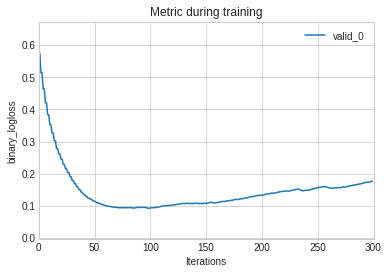

In [ ]:
plot_metric(lgbmc);

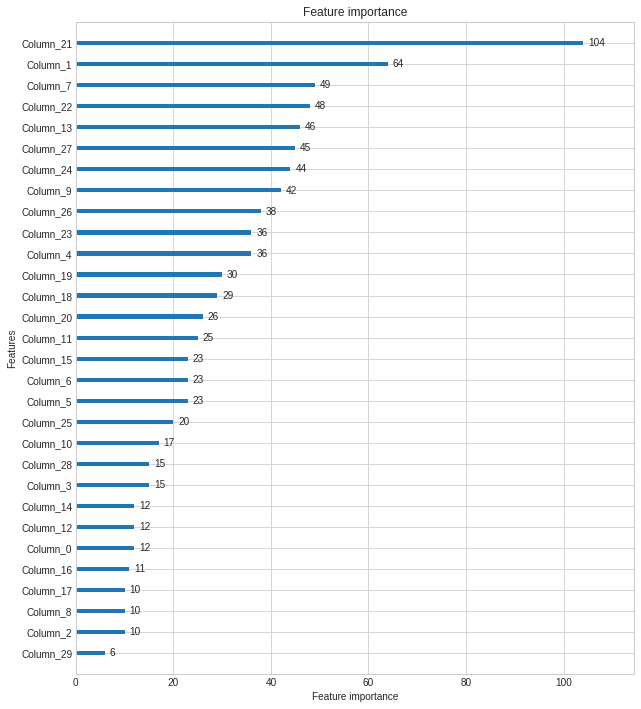

In [ ]:
plot_importance(lgbmc, figsize=(10,12));

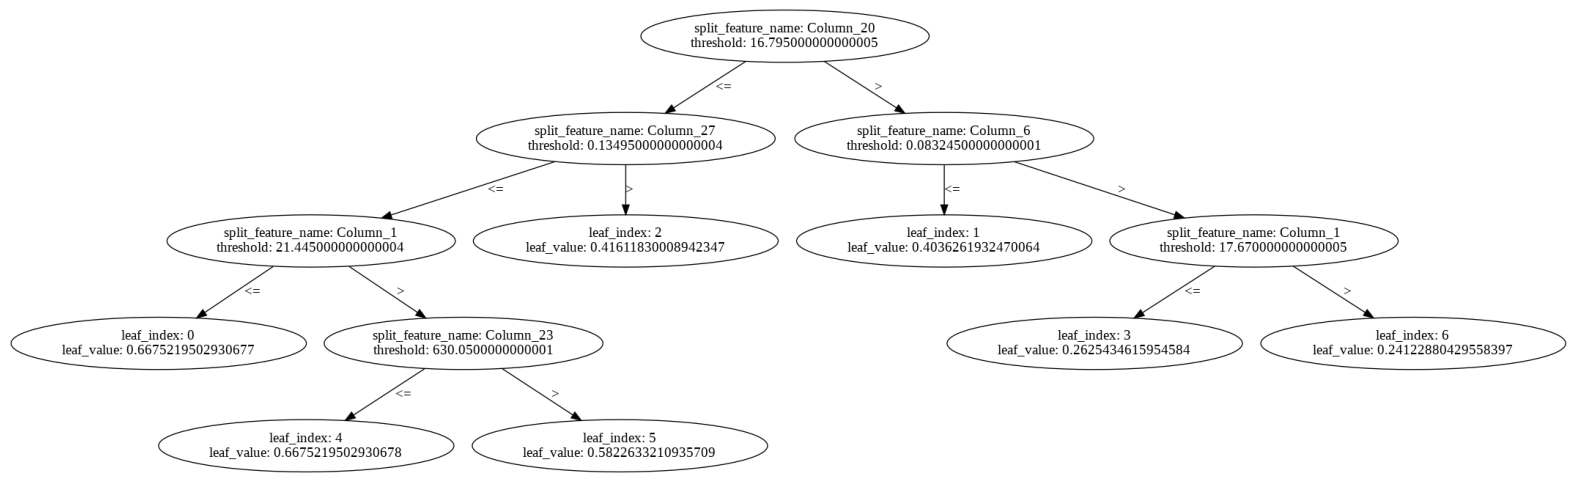

In [ ]:
plot_tree(lgbmc, figsize=(28,24));